###Business Scenario:   
Data Science extracts meaningful insight from chunks of raw data, which is useful to different business segments for planning their future course of action. Finance is probably one of the first to catch on to this trend with a rise in the penetration of analytics into many aspects of our lives. Here, we will analyze data from the stock market for some technology stocks such as Apple, Google, Amazon, and Microsoft.  
###Objective:   
Use Python libraries such as Pandas, Seaborn, and Matplotlib to extract and analyze the information, visualize it, and look at different ways to analyze the risk of a stock, based on its performance history.


    
The following tasks are to be performed:   
    
•Read the Data from Yahoo finance website directly.   
•Perform cleaning.   
•What was the change in stock price over time?   
•Visualize the change in a stock’s volume being traded, over time?   
•What was the moving average of various stocks?   
•What was the daily return average of a stock?   
•Adda new column ‘Trend’ whose values are based on the 'Daily Return'.•Visualize trend frequency through a Pie Chart.   
•What was the correlation between the daily returns of different stocks?

In [ ]:
pip install yfinance

In [ ]:
# instal yfinance module
#pip install -i https://pypi.anaconda.org/ranaroussi/simple yfinance

In [ ]:
# All Imports
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import math

# Creating Class to get Detail of stock

In [ ]:
class Stock_Detail:
  """
  This Class return Detail for one company
  inputs:
  company_code = (Sortform of company name) in str format
  ex:-
  Amazon.com, Inc.  | code -- 'AMZN'
  Apple Inc. | code -- 'AAPL'
  Alphabet Inc. | code -- 'GOOGL'
  Microsoft Corporation | code -- 'MSFT'

  histo = For how many time history you want to analyze. in str format
  ex:-
  To analyze 1 Day history  --  '1d'
  To analyze 493 Days history  --  '493d'
  To analyze 1 Month history  --  '1m'
  To analyze 15 Months history  --  '15m'
  To analyze 1 Year history  --  '1y'
  To analyze 8 Years history  --  '8y'

  Make shore company has that much period of history....!
  """
  def __init__(self, company_code, histo):
    """
    It extract Data from Yahoo Finance.
    And extract history DF and Name of company from Data.
    It will see any Null and NaN and Duplicate value present in DF.
    it will return DataFrame of Null and NaN and Duplicate ONLY if there are present in DF.
    """
    self.data = yf.Ticker(company_code)
    self.df = self.data.history(histo)
    self.company_name = self.data.info['longName']
    null = self.df.isnull().any().any()  # see for any null in DF
    nan = self.df.isna().any().any()  # see for any NaN in DF
    dup = self.df.duplicated().any()  # It will see for any Duplicate rows
    if (null or nan or dup):
      raise Exception("Data is not clean")

  # Get the DataFrame
  def get_df(self):
    return self.df

  #What was the change in stock price over time?
  def change_in_stock_price_over_time(self, days=1):
    """
    It will return the DataFrame of column (Date, Close, Price Differance of given days)
    Input:
    days:(1|Int(Days))
    """
    x = self.df['Close'][::days]
    a = [(x[i]-x[i+1]) for i in range(len(x)-1)]
    a.append(np.nan)
    return pd.DataFrame(data={'Close': x, f'Price Differance of Every {days}Day':a})

  #Visualize the change in a stock’s volume being traded, over time?
  def plot_volume_vs_time(self):
    """
    It will plot line graph of x = Date and y = Volume of trade
    """
    plt.figure(figsize=(22, 8))
    sns.lineplot(x=self.df.index,y=self.df['Volume'])
    plt.xticks(self.df.index[::100], rotation=90)
    plt.title(f'{self.company_name}Volum vs Time')
    plt.show()

  #What was the daily return average of a stock?
  def add_daily_return_column(self):
    """
    It will add a new column called Daily Return.
    And return the DataFrame with Daily Return.
    """
    self.df['Daily Return'] = self.df['Close'] - self.df['Open']
    return self.df

  # What was the daily return average of a stock?
  def daily_return_average(self, days=100):
    """
    It will print the averagr of daily return, by considering 
    number of days supplied.
    input:
    days = int
    """
    mean = (self.df['Close'][-days:] - self.df['Open'][-days:]).mean()
    print(f'Daily return average by considering {days} days is : {mean}')


  # What was the moving average of various stock
  def moving_average(self, period):
    """
    It will return the list of  Moving Average and also
    Plot the moving average graph
    input:
    period = In days
    """
    lst = []
    for i in range(period): 
      lst.append(self.df[-(period+period-i):-(period-i)]['Close'].mean())
    plt.plot(lst)
    plt.title(f'Moving Average for {period} Days')
    plt.xlabel("Days")
    plt.ylabel('Closing values of share')
    plt.show()
    return lst


  #Adda new column ‘Trend’ whose values are based on the 'Daily Return'
  def add_trend_column(self):
    trend = []
    count = 0
    self.df = self.add_daily_return_column()
    for i in list(self.df['Daily Return']):
      if i >= 0:
        percentage_profit = ((i/self.df['Open'][count])*100)
      if i <= 0:
        trend.append('Loss')
      elif 0 < percentage_profit <= 1:
        trend.append('Prifit of 0 to 1%')
      elif 1 < percentage_profit <= 5:
        trend.append('Prifit of 1 to 5%')
      elif 5 < percentage_profit:
        trend.append('Prifit of more then 5%')
      count += 1
    self.df['Trend'] = trend
    return self.df


  # Visualize trend frequency through a Pie Chart.
  def trend_frequency_Pie_Chart(self):
    """
    It will show a Pie chart to Visualize trend frequency.
    input:
    """
    self.df = self.add_trend_column()
    data = self.df['Trend'].value_counts()
    plt.pie(data, labels=data.index, autopct='%1.1f%%')
    plt.show()
  #What was the correlation between the daily returns of different stocks
  """
  To compair stock another class i will creat.
  """

# Creating Class to Compare Different Stocks

In [ ]:
class Stock_comparison:
  """
  This Class Compare number of companies.

  inputs:
  histo = For how many time history you want to analyze. in str format
  ex:-
  To analyze 1 Day history  --  '1d'
  To analyze 493 Days history  --  '493d'
  To analyze 1 Month history  --  '1m'
  To analyze 15 Months history  --  '15m'
  To analyze 1 Year history  --  '1y'
  To analyze 8 Years history  --  '8y'

  Make shore company has that period of history....!

  company_codes = (Sortform of company name)  supply comma separated code in str format
  ('AMZN', 'AAPL', 'GOOGL')
  ex:-
  Amazon.com, Inc.  | code -- 'AMZN'
  Apple Inc. | code -- 'AAPL'
  Alphabet Inc. | code -- 'GOOGL'
  Microsoft Corporation | code -- 'MSFT'
  """
  def __init__(self, histo, *company_codes):
    self.company_codes = company_codes
    self.histo = histo
    for i in self.company_codes:
      a = Stock_Detail(i, self.histo)
      data = a.get_df()
      null = data.isnull().any().any()  # see for any null in DF
      nan = data.isna().any().any()  # see for any NaN in DF
      dup = data.duplicated().any()  # It will see for any Duplicate rows
      if (null or nan or dup):
        raise Exception("Data is not clean")


  #Visualize the change in a stock’s volume being traded, over time?
  def plot_volumes_vs_time(self):
    """
    It will plot Volume VS Time of number of companies in one Graph.
    """
    plt.figure(figsize=(20, 8))
    for i in self.company_codes:
      a = Stock_Detail(i, self.histo)
      plt.plot((a.get_df()['Volume']), label = a.company_name)
      plt.title('Volum vs Time') 
      plt.legend()
    plt.show()


  #What was the moving average of various stocks?
  def moving_average(self, period, histo='1y'):
    """
    It will return the list of  Moving Average and also
    Plot the moving average graph
    input:
    period = In days in int format
    histo = For how many time history you want to analyze. in str format (Default = "1y")
    ex:-
    To analyze 1 Day history  --  '1d'
    To analyze 493 Days history  --  '493d'
    To analyze 1 Month history  --  '1m'
    To analyze 15 Months history  --  '15m'
    To analyze 1 Year history  --  '1y'
    To analyze 8 Years history  --  '8y'

    Make shore company has that period of history....! 
    """
    dic = {}
    com_list = []
    for i in self.company_codes:
      a = Stock_Detail(i, self.histo)
      data = a.get_df()
      lst = []
      com_list.append(a.company_name)
      for j in range(period): 
        lst.append(data[-(period+period-j):-(period-j)]['Close'].mean())
      dic[a.company_name] = lst

    dfma = pd.DataFrame(dic)

    fig, axes = plt.subplots(1, len(self.company_codes), figsize=(20, 5))
    for i in range(len(self.company_codes)):
      axes[i].plot(dfma[dfma.columns[i]])  #list(range(0, len(dic)+1)), 
      axes[i].set_title(com_list[i])
      axes[i].set(xlabel='Days', ylabel='Close')
    return dfma


  #Visualize trend frequency through a Pie Chart.
  def trend_frequency_Pie_Charts(self):
    fig, axes = plt.subplots(1, len(self.company_codes), figsize=(20, 5))
    count = 0
    com_list = []
    for i in self.company_codes:
      a = Stock_Detail(i, self.histo)
      com_list.append(a.company_name)
      data = a.add_trend_column()['Trend'].value_counts()
      axes[count].pie(data, labels=data.index, 
                      autopct='%1.1f%%',
                      startangle = -45,
                      radius=0.8)
      axes[count].set_title(com_list[count])
      count += 1


  #What was the correlation between the daily returns of different stocks?
  def correlation_beteen_stocks(self):
    dic = {}
    for i in self.company_codes:
      a = Stock_Detail(i, self.histo)
      dic[a.company_name] = a.add_daily_return_column()['Daily Return']
    dfcorr = pd.DataFrame(dic)
    return dfcorr.corr()



# Creating the Object and getting the Stock Details.

In [ ]:
a = Stock_Detail('AMZN', '1y')

In [ ]:
# What was the change in stock price over time?
a.change_in_stock_price_over_time(20)

,Close,Price Differance of Every 20Day
Date,,
2021-08-27,167.481506,-2.808487
2021-09-27,170.289993,4.271500
2021-10-25,166.018494,-12.610001
2021-11-22,178.628494,8.211487
2021-12-21,170.417007,18.749512
2022-01-20,151.667496,-2.985001
2022-02-17,154.652496,-6.598007
2022-03-18,161.250504,8.465500
2022-04-18,152.785004,41.974503


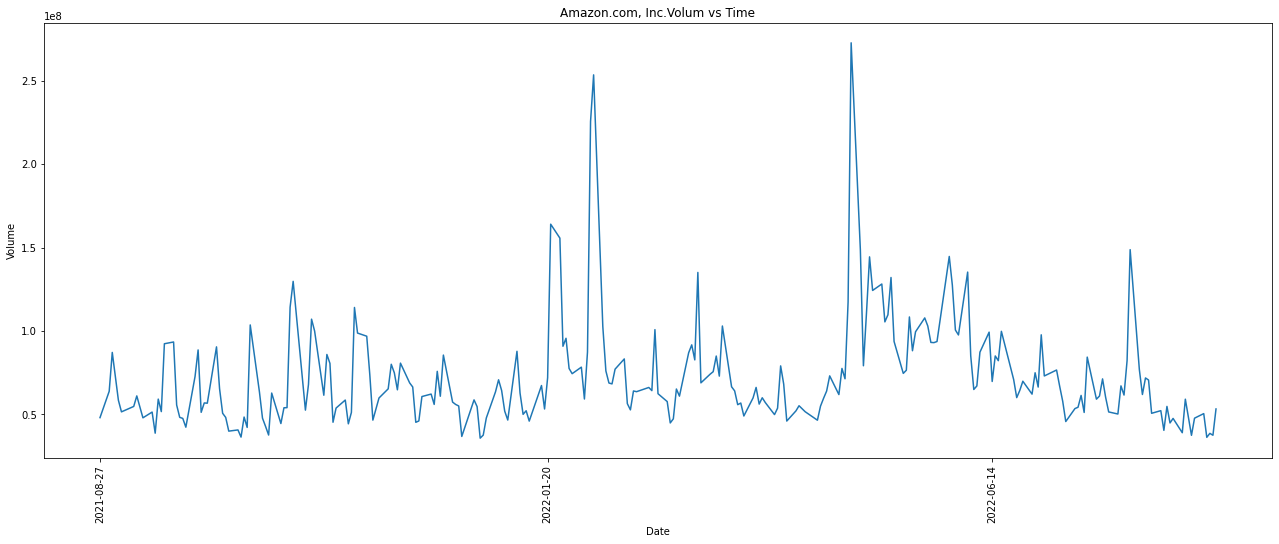

In [ ]:
# Visualize the change in a stock’s volume being traded, over time?
a.plot_volume_vs_time()

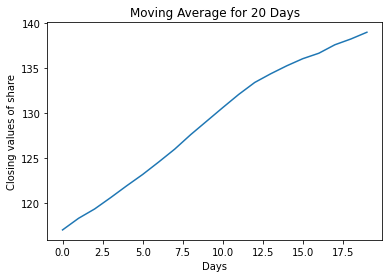

[117.03749961853028,
 118.32899971008301,
 119.36199989318848,
 120.62150001525879,
 121.93350028991699,
 123.19650039672851,
 124.57950057983399,
 126.01000061035157,
 127.62450065612794,
 129.12500076293946,
 130.62500076293946,
 132.096000289917,
 133.42450027465821,
 134.39100074768066,
 135.27450103759764,
 136.06500091552735,
 136.66900100708008,
 137.60950088500977,
 138.2510009765625,
 139.0010009765625]

In [ ]:
# What was the moving average of various stocks?
a.moving_average(20)

In [ ]:
# What was the daily return average of a stock?
a.add_daily_return_column()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Return
Date,,,,,,,,
2021-08-27,166.661499,167.615997,165.687500,167.481506,48048000,0,0.0,0.820007
2021-08-30,167.871506,172.250000,167.761002,171.078506,63844000,0,0.0,3.207001
2021-08-31,171.240005,173.628998,169.779495,173.539505,87128000,0,0.0,2.299500
2021-09-01,174.820007,176.350006,173.761993,173.949997,72598000,0,0.0,-0.870010
2021-09-02,174.738007,175.598007,172.750000,173.156006,58474000,0,0.0,-1.582001
...,...,...,...,...,...,...,...,...
2022-08-22,135.720001,136.320007,132.850006,133.220001,50461500,0,0.0,-2.500000
2022-08-23,133.410004,134.990005,132.949997,133.619995,36252100,0,0.0,0.209991
2022-08-24,132.750000,135.470001,132.100006,133.800003,38627000,0,0.0,1.050003


In [ ]:
# Daily return average
a.daily_return_average()

Daily return average by considering 100 days is : -0.13744956970214844


In [ ]:
# Adda new column ‘Trend’ whose values are based on the 'Daily Return'.
a.add_trend_column()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Return,Trend
Date,,,,,,,,,
2021-08-27,166.661499,167.615997,165.687500,167.481506,48048000,0,0.0,0.820007,Prifit of 0 to 1%
2021-08-30,167.871506,172.250000,167.761002,171.078506,63844000,0,0.0,3.207001,Prifit of 1 to 5%
2021-08-31,171.240005,173.628998,169.779495,173.539505,87128000,0,0.0,2.299500,Prifit of 1 to 5%
2021-09-01,174.820007,176.350006,173.761993,173.949997,72598000,0,0.0,-0.870010,Loss
2021-09-02,174.738007,175.598007,172.750000,173.156006,58474000,0,0.0,-1.582001,Loss
...,...,...,...,...,...,...,...,...,...
2022-08-22,135.720001,136.320007,132.850006,133.220001,50461500,0,0.0,-2.500000,Loss
2022-08-23,133.410004,134.990005,132.949997,133.619995,36252100,0,0.0,0.209991,Prifit of 0 to 1%
2022-08-24,132.750000,135.470001,132.100006,133.800003,38627000,0,0.0,1.050003,Prifit of 0 to 1%


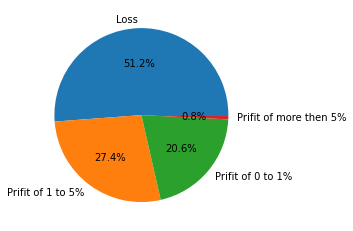

In [ ]:
# Visualize trend frequency through a Pie Chart.
a.trend_frequency_Pie_Chart()

# Creating the Object and comparing the Stocks

In [ ]:
b = Stock_comparison('1y', 'AMZN', 'AAPL', 'GOOGL',  'MSFT')

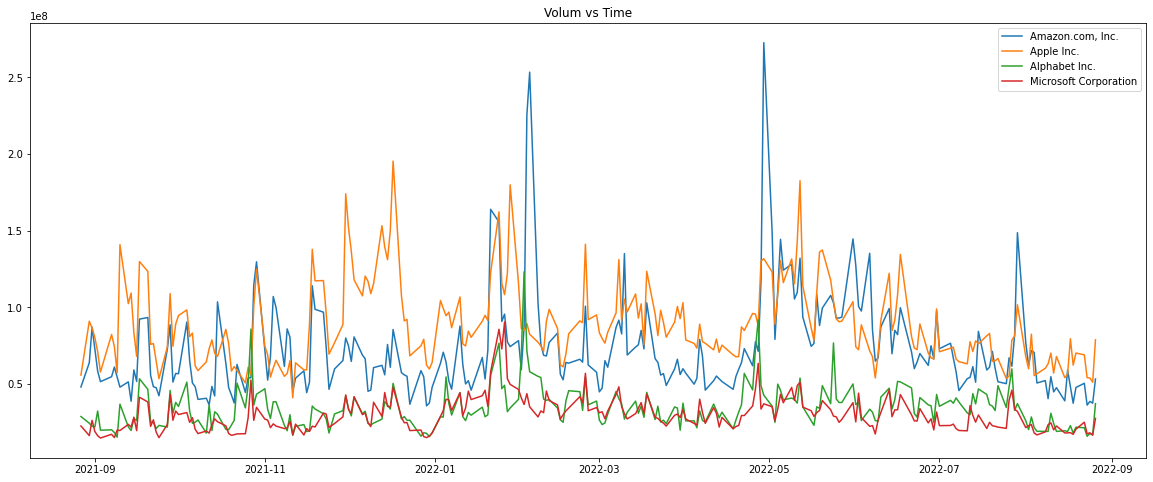

In [ ]:
# Visualize the change in a stock’s volume being traded, over time?
b.plot_volumes_vs_time()

,"Amazon.com, Inc.",Apple Inc.,Alphabet Inc.,Microsoft Corporation
0,126.683330,153.054267,118.02937,271.794727
1,125.475430,152.160645,117.33822,270.493736
2,124.424711,151.361397,116.75013,269.472822
3,123.442621,150.642048,116.26324,268.536216
4,122.532411,149.953196,115.82724,267.675045
5,121.758771,149.409215,115.49561,267.161392
6,121.072221,148.894849,115.30082,266.887881
7,120.225801,148.325840,115.01961,266.447582
8,119.339671,147.774456,114.72516,265.994549
9,118.462371,147.263209,114.40566,265.603217


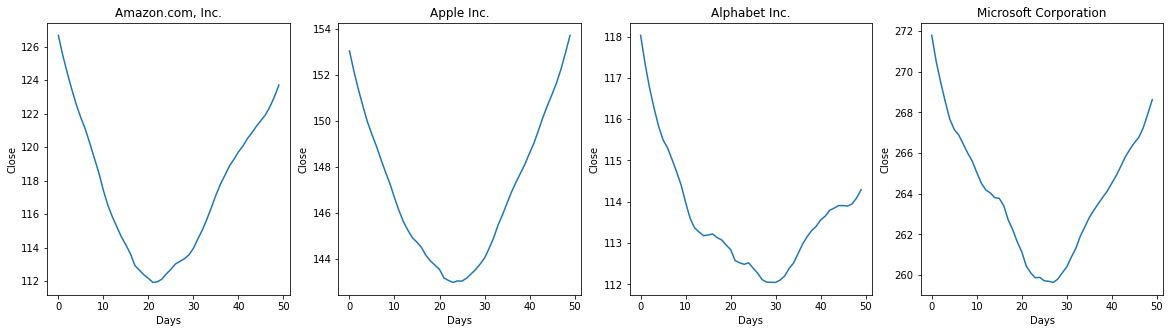

In [ ]:
# What was the moving average of various stocks?
b.moving_average(50)

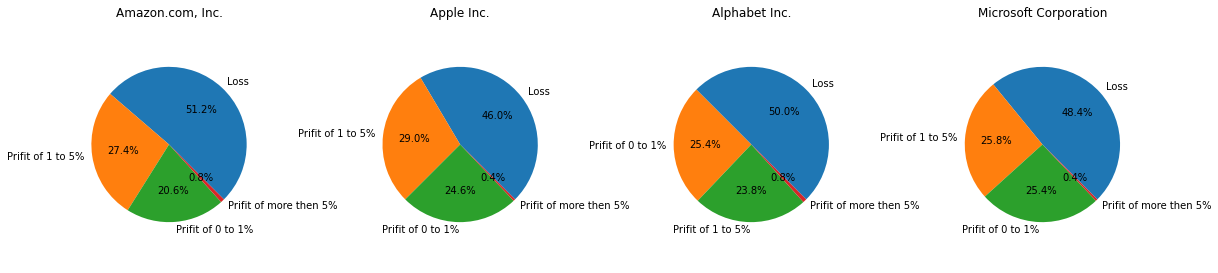

In [ ]:
# Visualize trend frequency through a Pie Chart.
b.trend_frequency_Pie_Charts()

In [ ]:
# What was the correlation between the daily returns of different stocks?
b.correlation_beteen_stocks()

,"Amazon.com, Inc.",Apple Inc.,Alphabet Inc.,Microsoft Corporation
"Amazon.com, Inc.",1.000000,0.729089,0.768201,0.765860
Apple Inc.,0.729089,1.000000,0.724325,0.798697
Alphabet Inc.,0.768201,0.724325,1.000000,0.821582
Microsoft Corporation,0.765860,0.798697,0.821582,1.000000
